In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('C:\\Users\\Dhruv\\Machine-Learning\\code\\files\\project_files\\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
feature_data = data.drop('Outcome', axis=1)
target_data = data['Outcome']

In [8]:
feature_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
target_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, random_state=42)

<AxesSubplot:>

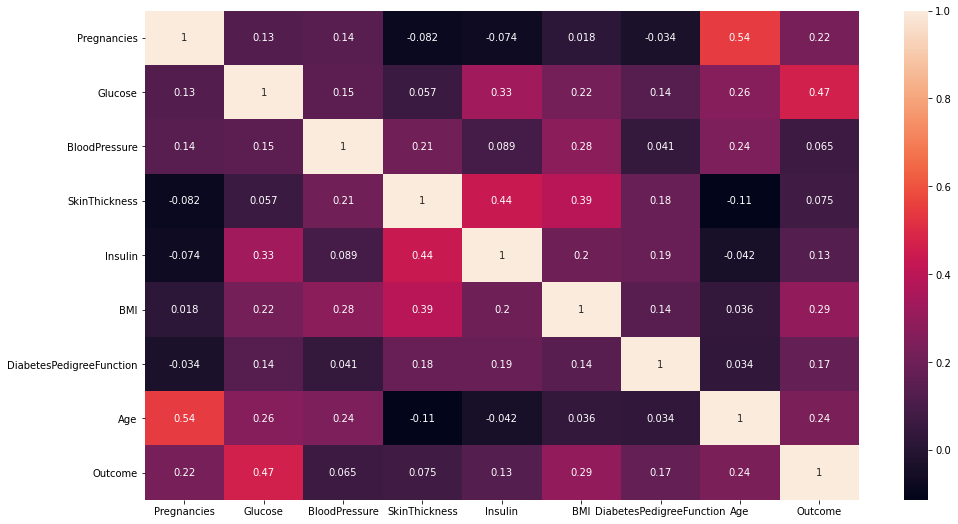

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

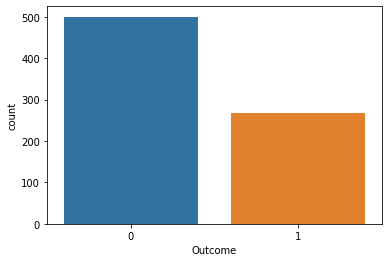

In [12]:
sns.countplot(x=data['Outcome'])

## KNeighbors

In [13]:
knn = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)

knn_pred = knn.score(X_test, y_test)

print("Training score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test, y_test)))

Training score: 0.788
Test score: 0.745


## Linear regression


In [14]:
lin_reg = LinearRegression().fit(X_train, y_train)

linreg_pred = lin_reg.score(X_test, y_test)

print("Training score: {:.3f}".format(lin_reg.score(X_train, y_train)))
print("Test score: {:.3f}".format(lin_reg.score(X_test, y_test)))

Training score: 0.317
Test score: 0.221


##  Ridge regression

In [15]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)

ridge_pred = ridge.score(X_test, y_test)

print("Training score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.3f}".format(ridge.score(X_test, y_test)))

Training score: 0.317
Test score: 0.221


## Decision tree classifier

In [16]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

tree_pred = tree.score(X_test, y_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Training score: 0.844
Test score: 0.724


## Random Forests

In [17]:
rf = RandomForestClassifier(n_estimators=6, max_features=3, random_state=0).fit(X_train, y_train)

rf_pred = rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 0.965
Test score: 0.760


## Gradient Bossted forests

In [18]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=0)
gb.fit(X_train, y_train)

gb_pred = gb.score(X_test, y_test)

print("Training score: {:.3f}".format(gb.score(X_train, y_train)))
print("Test score: {:.3f}".format(gb.score(X_test, y_test)))

Training score: 0.847
Test score: 0.755


## Logistic regression

In [19]:
logreg = LogisticRegression(C=10, max_iter=100000).fit(X_train, y_train)
logreg_pred = logreg.score(X_test, y_test)

print("Training score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg.score(X_test, y_test)))

Training score: 0.783
Test score: 0.729


## SVC

In [28]:
svm = SVC(kernel='rbf').fit(X_train, y_train)

svc_pred = svm.score(X_test, y_test)

print("Training score: {:.3f}".format(svm.score(X_train, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test, y_test)))

Training score: 0.778
Test score: 0.729


## LinearSVC

In [27]:
ls = LinearSVC(C=10, max_iter=100000).fit(X_train, y_train)

ls_pred = ls.score(X_test, y_test)

print("Training score: {:.3f}".format(ls.score(X_train, y_train)))
print("Test score: {:.3f}".format(ls.score(X_test, y_test)))

Training score: 0.736
Test score: 0.740
c:\Users\Dhruv\Machine-Learning\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
